In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, how="inner", on=["city", "city"])

# Display the data table for preview


In [14]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [15]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [16]:
city_ride_df.type.value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

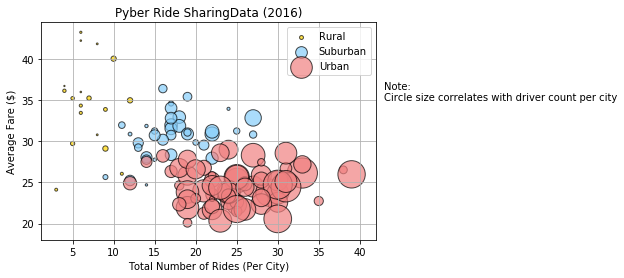

In [17]:
# Obtain the x and y coordinates for each of the three city types
g_fare = city_ride_df.groupby(['type','city'])['fare'].mean() #['city','fare','driver_count']
g_ride = city_ride_df.groupby(['type','city'])['ride_id'].count() #['city','fare','driver_count']
g_drivers = city_ride_df.groupby(['type','city'])['driver_count'].sum() #['city','fare','driver_count']

s_city_type = city_ride_df.type.unique()

df_city_type = city_ride_df.groupby(['type','city'], as_index=False)['fare'].mean()

total_r = df_city_type.type.eq('Rural').sum()
total_s = df_city_type.type.eq('Suburban').sum()
total_u = df_city_type.type.eq('Urban').sum()

color_r = 'Gold'
color_s = 'LightSkyBlue'
color_u = 'LightCoral'
bubble_size = 0.4

#     [expr for val in collection if condition]
x_r = [g_ride[x] for x in range(total_r)]
y_r = [g_fare[x] for x in range(total_r)]
z_r = [float(g_drivers[x]) * bubble_size for x in range(total_r)]

x_s = [g_ride[x] for x in range(total_r,total_r + total_s)]
y_s = [g_fare[x] for x in range(total_r,total_r + total_s)]
z_s = [float(g_drivers[x]) * bubble_size for x in range(total_r,total_r + total_s)]

x_u = [g_ride[x] for x in range(total_r + total_s, total_r + total_s + total_u)]
y_u = [g_fare[x] for x in range(total_r + total_s, total_r + total_s + total_u)]
z_u = [float(g_drivers[x]) * bubble_size for x in range(total_r + total_s, total_r + total_s + total_u)]  

# Build the scatter plots for each city types
plt.scatter(x_r, y_r, z_r, alpha=0.7, color=color_r, edgecolors='black', label = 'Rural', marker="o")#
plt.scatter(x_s, y_s, z_s, alpha=0.7, color=color_s, edgecolors='black', label = 'Suburban', marker="o")#
plt.scatter(x_u, y_u, z_u, alpha=0.7, color=color_u, edgecolors='black', label = 'Urban', marker="o")#

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride SharingData (2016)")
plt.grid()

# Create a legend
plt.legend()

# Incorporate a text label regarding circle size
plt.text(43,35,'Note:\nCircle size correlates with driver count per city')

# Save Figure
plt.savefig("Ride_Sharing_Data.png")
plt.show()

In [18]:
# Show plot
plt.show()

## Total Fares by City Type

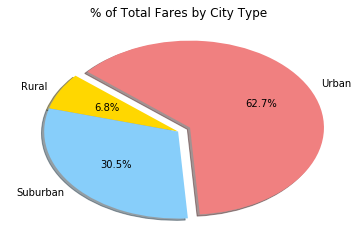

<Figure size 432x288 with 0 Axes>

In [19]:
# Calculate Type Percents
g_fare = city_ride_df.groupby(['type','city'])['fare'].sum()
fare_r = [g_fare[x] for x in range(total_r)]
fare_s = [g_fare[x] for x in range(total_r,total_r + total_s)]
fare_u = [g_fare[x] for x in range(total_r + total_s, total_r + total_s + total_u)]

labels = ['Rural','Suburban','Urban']
sizes = [sum(fare_r), sum(fare_s), sum(fare_u),]
explode = (0, 0, 0.1)
colors = [color_r,color_s,color_u]
# Build Pie Chart
plt.title('% of Total Fares by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()
# Save Figure
plt.savefig("Total_Fares_by_City_Type.png")

In [20]:
#city_ride_df.to_csv('join.csv')

In [21]:
# Show Figure
plt.show()

## Total Rides by City Type

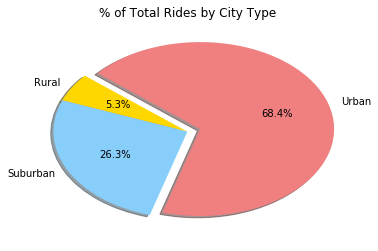

<Figure size 432x288 with 0 Axes>

In [22]:
# Calculate Type Percents
g_ride = city_ride_df.groupby(['type','city'])['ride_id'].count()
ride_r = [g_ride[x] for x in range(total_r)]
ride_s = [g_ride[x] for x in range(total_r,total_r + total_s)]
ride_u = [g_ride[x] for x in range(total_r + total_s, total_r + total_s + total_u)]

labels = ['Rural','Suburban','Urban']
sizes = [sum(ride_r), sum(ride_s), sum(ride_u),]
explode = (0, 0, 0.1)
colors = [color_r,color_s,color_u]
# Build Pie Chart
plt.title('% of Total Rides by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()
# Save Figure
plt.savefig("Total_Rides_by_City_Type.png")


In [23]:
# Show Figure
plt.show()

## Total Drivers by City Type

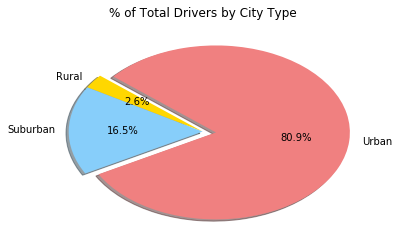

<Figure size 432x288 with 0 Axes>

In [27]:
# Calculate Driver Percents
g_drivers = city_df.groupby(['type','city'])['driver_count'].sum()
drivers_r = [g_drivers[x] for x in range(total_r)]
drivers_s = [g_drivers[x] for x in range(total_r,total_r + total_s)]
drivers_u = [g_drivers[x] for x in range(total_r + total_s, total_r + total_s + total_u)]

#print(drivers_r)
#print(sum(drivers_r))

#print(drivers_s)
#print(sum(drivers_s))

#print(drivers_s)
#print(sum(drivers_u))

labels = ['Rural','Suburban','Urban']
sizes = [sum(drivers_r), sum(drivers_s), sum(drivers_u),]
explode = (0, 0, 0.1)
colors = [color_r,color_s,color_u]
# Build Pie Chart
plt.title('% of Total Drivers by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()
# Save Figure
plt.savefig("Total_Drivers_by_City_Type.png")